## Ejercicios pandas

#### Ejercicio EVO

Dado el siguiente código:

In [2]:
import requests
import time
from datetime import timedelta, date

url_evo  = "https://api.evobanco.com:8443/evobanco/foreign/exchange/v1/rates"

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
        
start_date = date(2020, 1, 1)
end_date = date(2020, 1, 2)

res = []
fecha = []
for date in daterange(start_date, end_date):

    date_str = date.strftime("%Y-%m-%d")
    print(date_str)

    payload = {"cardType": "MC",
               "amount": 1,
               "sourceCurrencyCode": 'USD',
               "fxDate": date_str}

    r_evo = requests.post(url_evo, json=payload)

    if r_evo.status_code == requests.codes.ok:
        d = r_evo.json()
        res.append(d['rate'])
        fecha.append(d['date'])
    
    
    time.sleep(5)

2020-01-01


1. Crear un objeto de tipo Serie que contenga la tasa de conversión como los valores y la fecha como índice

2. Encontrar los dias con la menor y mayor tasa de cambio

3. (Opcional) Escribir el código anterior en una función

#### Ejercicio alojamientos

1. Leer el fichero "alojamientos.json" como un DataFrame de pandas

2. Contar cuantos alojamientos hay en cada código postal

#### Ejercicio numpy

Repetir el ejercicio de las notas numpy pero usando `pd.cut()`

#### Ejercicio 1

Tenemos las siguientes listas de marcas, modelos y precios en euros de 
arneses de escalada:

In [5]:
marcas  = ['HP', 'HP', 'ASUS', 'Lenovo', 'ASUS', 'ASUS', 'HP',
          'Acer', 'Lenovo', 'HP']
modelos = ['Envy', 'Pavilion', 'Transformer', 'Ideapad', 'Zenbook', 'Vivobook', '255',
           'Aspire', 'Ideapad 530S', 'Stream']
precios = [1099.00, 927.48, 199.00, 365.17, 899.00, 599.00, 260.31, 285.09, 
           699.00, 164.37]

In [75]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'marca': marcas,
                   'modelo': modelos,
                   'precio': precios})

In [76]:
df['ventas'] = np.random.randint(0, 50, size=df.shape[0])

In [77]:
not_hp = df['marca'] != 'HP'
df['precio_descuento'] = df.loc[not_hp, 'precio'] * 0.9
df['precio_descuento'] = df['precio_descuento'].fillna(value=df['precio'])

In [86]:
df['total'] = df['ventas'] * df['precio_descuento']

In [92]:
df.sum()

marca                            HPHPASUSLenovoASUSASUSHPAcerLenovoHP
modelo              EnvyPavilionTransformerIdeapadZenbookVivobook2...
precio                                                        5497.42
ventas                                                            277
precio_descuento                                              5192.79
total                                                          166532
dtype: object

In [93]:
df.mean()

precio                549.7420
ventas                 27.7000
precio_descuento      519.2794
total               16653.2434
dtype: float64

1. Construir un DataFrame con los datos anteriores.
2. Localizar los modelos que tienen un precio menor de 500 euros.
3. Crea un array de 10 números aleatorios entre 0 y 50 y añádela al DataFrame en la columna 'Ventas' (`np.random.randint`)
4. Crear una nueva columna que contenga el precio original para todos los productos salvo los de la marca HP, a los que se aplicará un descuento del 10%.
5. Añade en la columna 'Total' el producto del precio de cada portátil por el número de unidades vendidas ('Ventas')
6. Calcular las ventas y ganancias totales
7. (Avanzado) Calcular las ventas y ganancias totales y número de productos para cada marca

#### Ejercicio 2

1. Carga en un DataFrame este dataset:
https://archive.ics.uci.edu/ml/datasets/Automobile
2. Comprueba si tiene datos que faltan y elimina dichas filas
3. Obtén la longitud (`length`) y anchuras (`width`) medias
4. Analiza el atributo peso (`curb-weight`) y dibuja su histograma
5. Analiza cuál es el número de cilindros (`num-of-cylinders`) más frecuente
6. Obtén una lista ordenada de las diferentes marcas (`make`) de coches y cuantos coches hay de cada una. Haz un gráfico de barras con esa información
7. Haz un gráfico de dispersión (*scatter plot*) de las columnas `length` y `width`
8. Dibuja un boxplot de todas las columnas numéricas. Ahora repítelo sin la columna precio. 


9. Repite el apartado 3 por cada categoría de `body-style`
10. Calcula la media del precio (`price`) para los coches agrupados por número de puertas (`num-of-doors`) y tipo de tracción (`engine-location`)
11. Selecciona los coches de la marca Toyota y cuyo precio sea mayor que la media
12. (Avanzado) En lugar de eliminar los datos que faltan complétalos. Si la columna es numérica, complétalos con la media, sino con el valor más frecuente

[Tipos de gráficos en pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#other-plots)


In [11]:
import pandas as pd

colnames = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
            'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
            'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
            'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

autos = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', 
                    sep=',', 
                    header=None,
                    names=colnames,
                    na_values='?')

In [19]:
autos_nona = autos.dropna()

In [25]:
autos_nona[['length', 'width']].mean()

length    172.413836
width      65.607547
dtype: float64

In [32]:
autos_nona['num-of-cylinders'].value_counts()

four     136
six       14
five       7
eight      1
three      1
Name: num-of-cylinders, dtype: int64

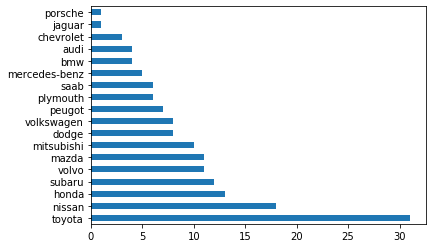

In [38]:
autos_nona['make'].value_counts().plot(kind='barh');

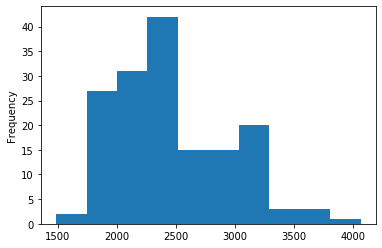

In [28]:
autos_nona['curb-weight'].plot(kind='hist');

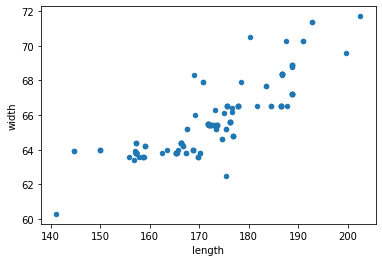

In [41]:
autos_nona.plot(kind='scatter', x='length', y='width');

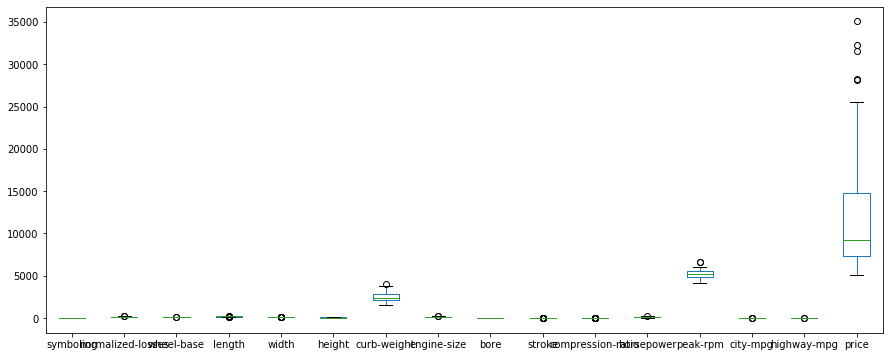

In [44]:
autos_nona.plot(kind='box', figsize=(15, 6));

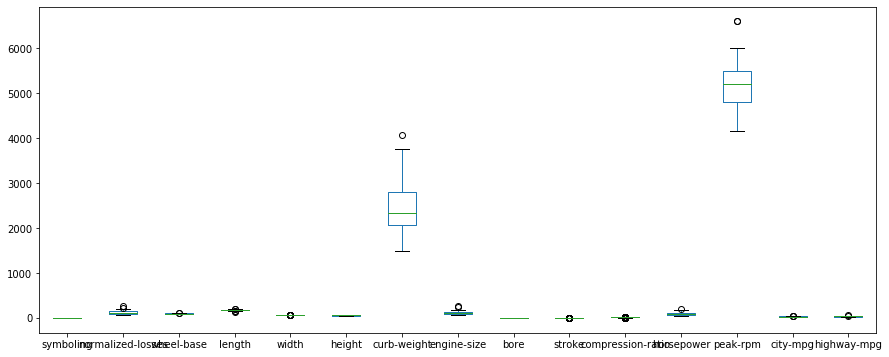

In [47]:
autos_nona.drop(columns='price').plot(kind='box', figsize=(15, 6));

#### Ejercicio 3

1. Carga en un DataFrame este dataset:
https://archive.ics.uci.edu/ml/datasets/Census+Income
2. Estudia si hay variables como el nivel educativo o el país que influyen en
que se tuviese un salario mayor o menor de 50K. Puedes simplemente
obtener la cuenta de las veces que sucede una u otra cosa de los
diferentes grupos para comenzar, y después utilizar técnicas gráficas, e
incluso un contraste de hipótesis.

#### Ejercicio 4

Con el conjunto de datos `weather`:
  * Crear una variable 'Month' con el mes de cada observación
  * Calcular el número de días que nieva cada mes en porcentaje
  * Hacer un gráfico de barras de la variable anterior

Con el conjunto de datos `nycity`:
  * Seleccionar las columnas 'Complaint Type' y 'Location Type'
  * Seleccionar las filas con quejas de ruido ("Noise")
  * Ver que localización ('Location Type') tiene más quejas de ruido
  * Ordenaro de menor a mayor
  * Hacer un gráfico de barras del número de quejas

#### Ejercicio 5

Con el conjunto de datos de las `bikes2016.csv`:
  * Repetir el análisis del notebook principal para los dias de la semana

Con el fichero `AccidentesBicicletas_2017.csv` (http://datos.madrid.es/portal/site/egob), que contiene información sobre los accidentes de tráfico con implicación de bicicletas en Madrid:
  * Leer el fichero en un `DataFrame` de Pandas
  * Ver cuántas variables hay y contar los valores que faltan en cada una de ellas
  * Ver cual es el distrito con más accidentes
  * Hacer un gráfico con el número de accidentes que hay de cada tipo
  * Hacer un gráfico de barras con el número de accidentes por mes

#### Ejercicio 6

Con el conjunto de datos `titanic.csv` (https://www.kaggle.com/c/titanic):
 * Leer los datos en un DataFrame de Pandas
 * Calcular el porcentaje de pasajeros que sobrevivió
 * Ver cuantos valores faltan en cada una de las variables (pista .isnull())
 * Eliminar la variable `cabin`
 * Completar los valores que faltan en `age` con la mediana del resto
 * Crear una nueva variable que contenga el número total de parientes incluyendo al pasajero
 * Crear una nueva variable booleana que sea `True` si el pasajero viajaba solo y `Falso` en caso contrario
 * Calcular la probabilidad de supervivencia en base al sexo
 * Extraer de la varible nombre una nueva que sea el título ('Mr', 'Ms', etc)